In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel 
import pandas as pd

## Spherical core 

*BlockCopolymerMicelle*

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_BlockCopolymerMicelle.c

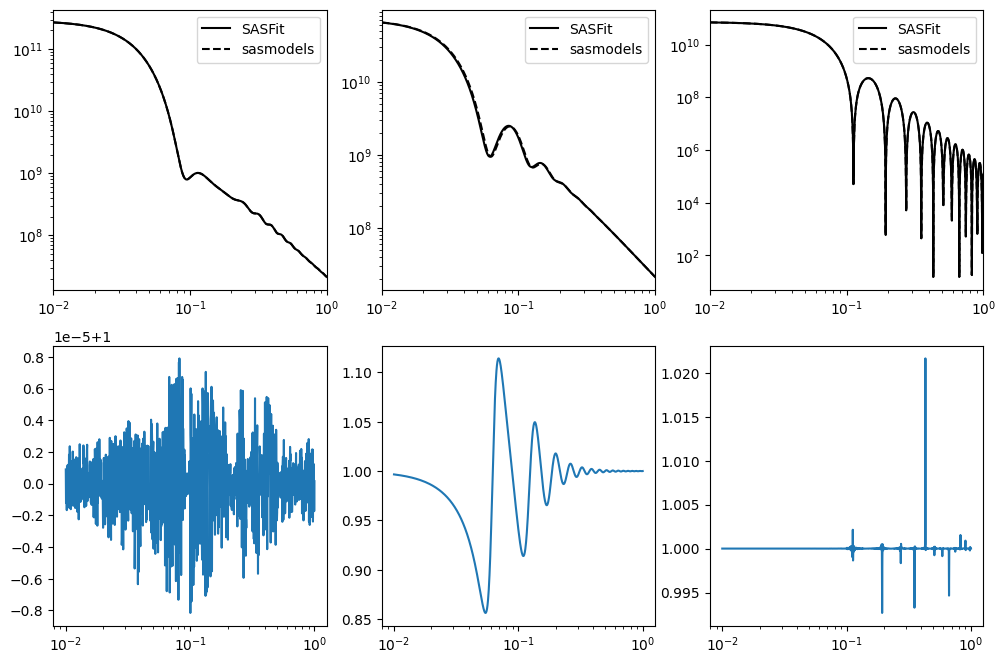

CPU times: user 1.4 s, sys: 95.6 ms, total: 1.49 s
Wall time: 964 ms


In [10]:
%%time
files = ["01_sph_homogenous", "01_sph_shell", "01_sph_core"]
model = load_model("../models/spherical_micelle.py")

fig, axs = plt.subplots(2,3, figsize=(3*4, 2*4))
# contrasts in the order of solvent, core, corona
contrasts = [[1,2,2], # homogenous
[1,1,2], # corona/shell
[1,2,1] # core
] 
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    sphere_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': 40.0,
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            } 
    data_sasfit = pd.read_csv("./SASFit/version2/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]*1e6
    axs[0,i].loglog(q, Iq_sasfit, color='k', label="SASFit")

    kernel = model.make_kernel([q])
    Iq_sasmodels = call_kernel(kernel, sphere_params)
    axs[0,i].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")

    axs[0,i].set_xlim([1e-2, 1e0])
    axs[0,i].legend()

    axs[1,i].plot(q, Iq_sasfit/Iq_sasmodels)
    axs[1,i].set_xscale('log')
plt.show()

## Cylinder

*CYL+Chains(RW)_Rc* 
https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/cyl_rwbrush/sasfit_ff_cyl_rwbrush_rc.c

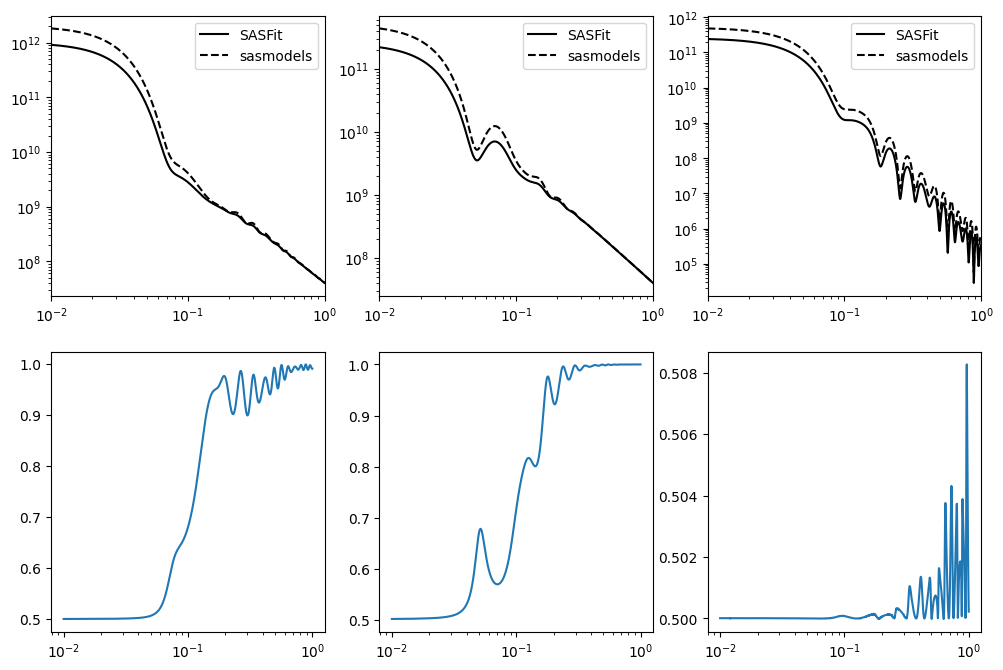

CPU times: user 1.56 s, sys: 101 ms, total: 1.66 s
Wall time: 1.14 s


In [17]:
%%time

files = ["02_cyl_homogenous", "02_cyl_shell", "02_cyl_core"]
model = load_model("../models/cylindrical_micelle.py")

fig, axs = plt.subplots(2,3, figsize=(3*4, 2*4))
contrasts = [[1,2,2], [1,1,2], [1,2,1]]
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    cyl_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': 40.0,
            'length_core' : 100.0,
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    data_sasfit = pd.read_csv("./SASFit/version2/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]*1e6
    axs[0,i].loglog(q, Iq_sasfit, color='k', label="SASFit")
    kernel = model.make_kernel([q])
    Iq_sasmodels = call_kernel(kernel, cyl_params)
    axs[0,i].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")

    axs[0,i].set_xlim([1e-2, 1e0])
    axs[0,i].legend()
    axs[1,i].plot(q, Iq_sasfit/Iq_sasmodels)
    axs[1,i].set_xscale('log')
plt.show()

### Other cylindrical core micelle geometries

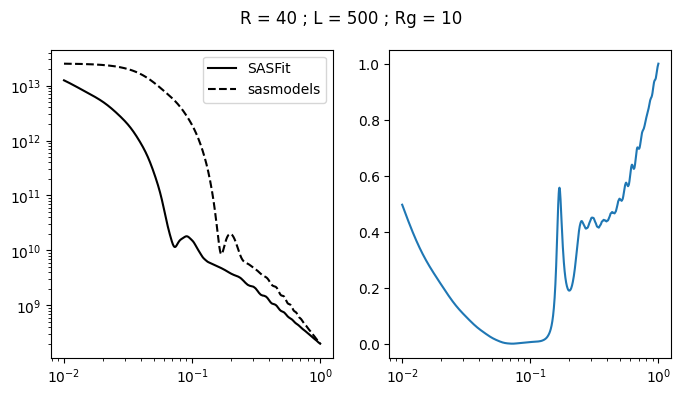

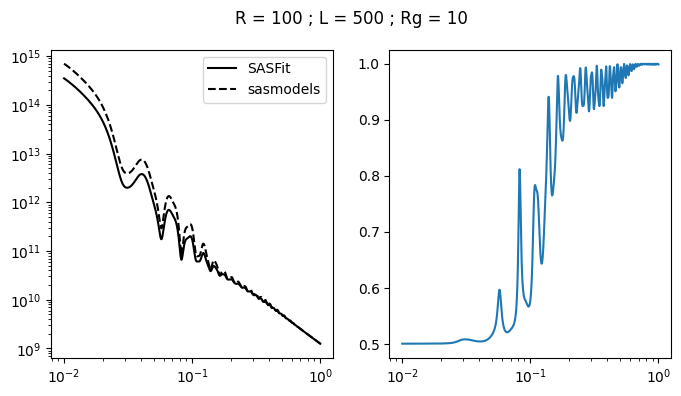

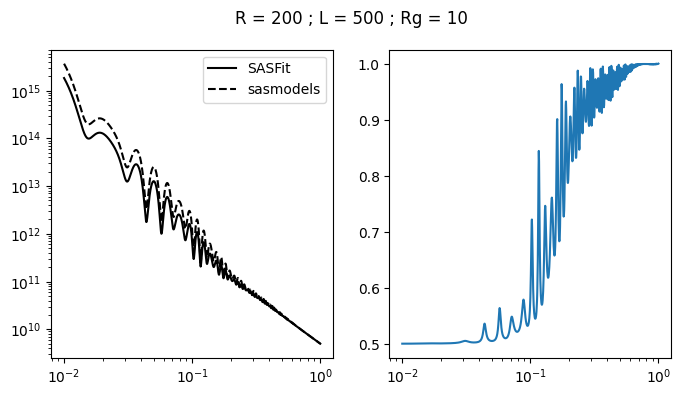

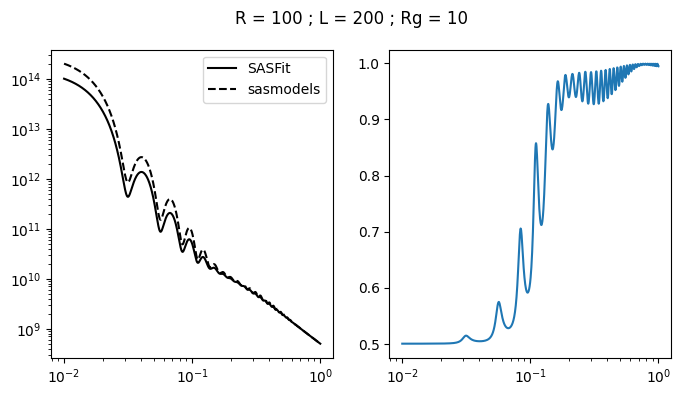

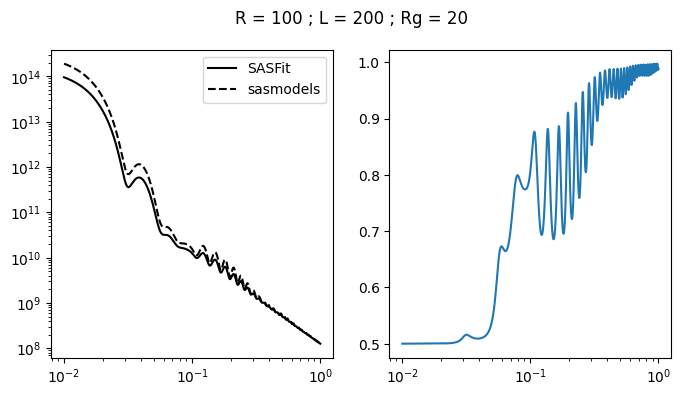

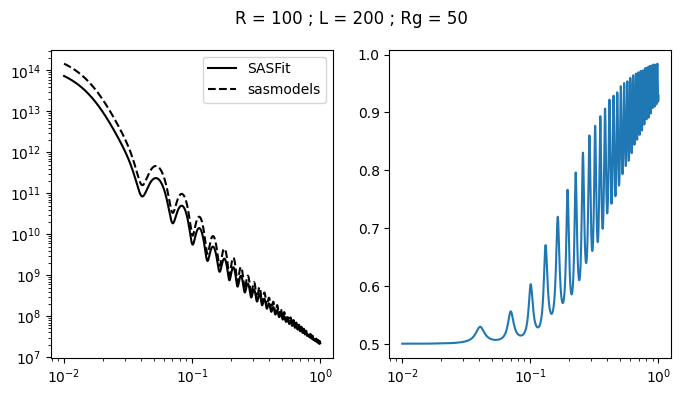

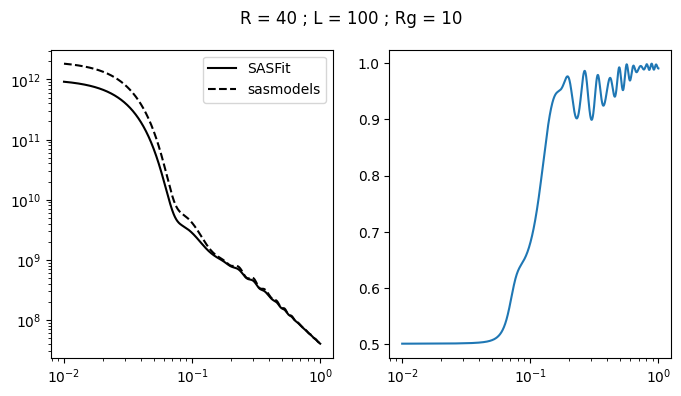

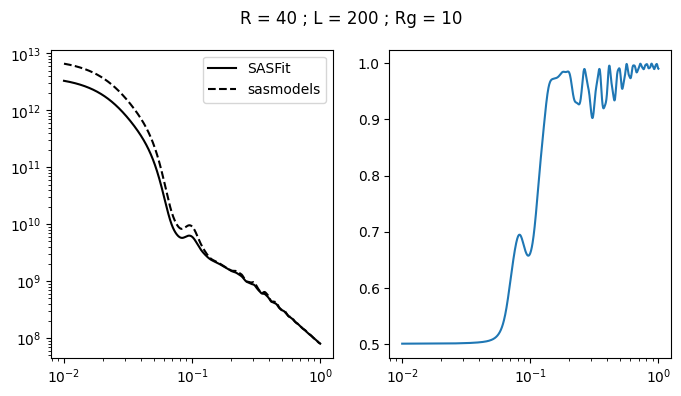

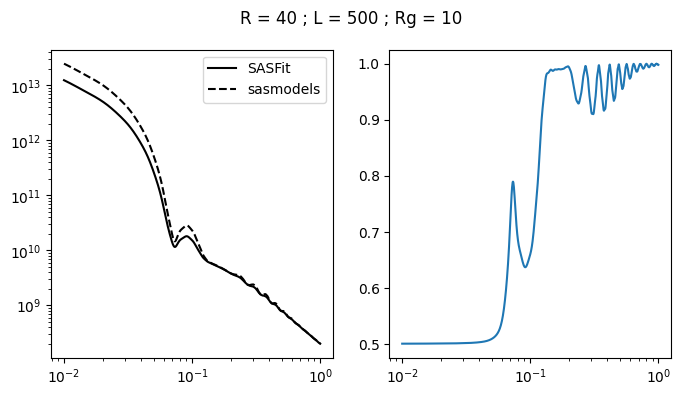

In [7]:
cyl_geom_pars = [(40,10,500), (100,10,500), (200,10,500),
                 (100,10,200), (100,20,200), (100,50,200),
                 (40,10,100), (40,10,200), (40,10,500)
                 ]
model = load_model("../models/cylindrical_micelle.py")

for i in range(len(cyl_geom_pars)):
    R, Rg, L = cyl_geom_pars[i]
    cyl_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : 1.0,
            'sld_core' : 2.0,
            'sld_corona' : 2.0,
            'radius_core': R,
            'length_core' : L,
            'rg': Rg,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    
    fig, axs = plt.subplots(1,2, figsize=(4*2, 4))
    data_sasfit = pd.read_csv("./SASFit/version2/02_cyl_hom_%d_%d_%d"%(R, Rg, L), sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]*1e6
    axs[0].loglog(q, Iq_sasfit, color='k', label="SASFit")

    Iq_sasmodels = call_kernel(kernel, cyl_params)
    kernel = model.make_kernel([q])
    axs[0].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")

    axs[0].legend()

    axs[1].plot(q, Iq_sasfit/Iq_sasmodels)
    axs[1].set_xscale('log')

    fig.suptitle(r'R = %d ; L = %d ; Rg = %d'%(R, L, Rg))
    plt.show()

## Long cylinder or Rod 

*ROD+Chains(RW)_Rc* 

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_Rod_RWbrush.c

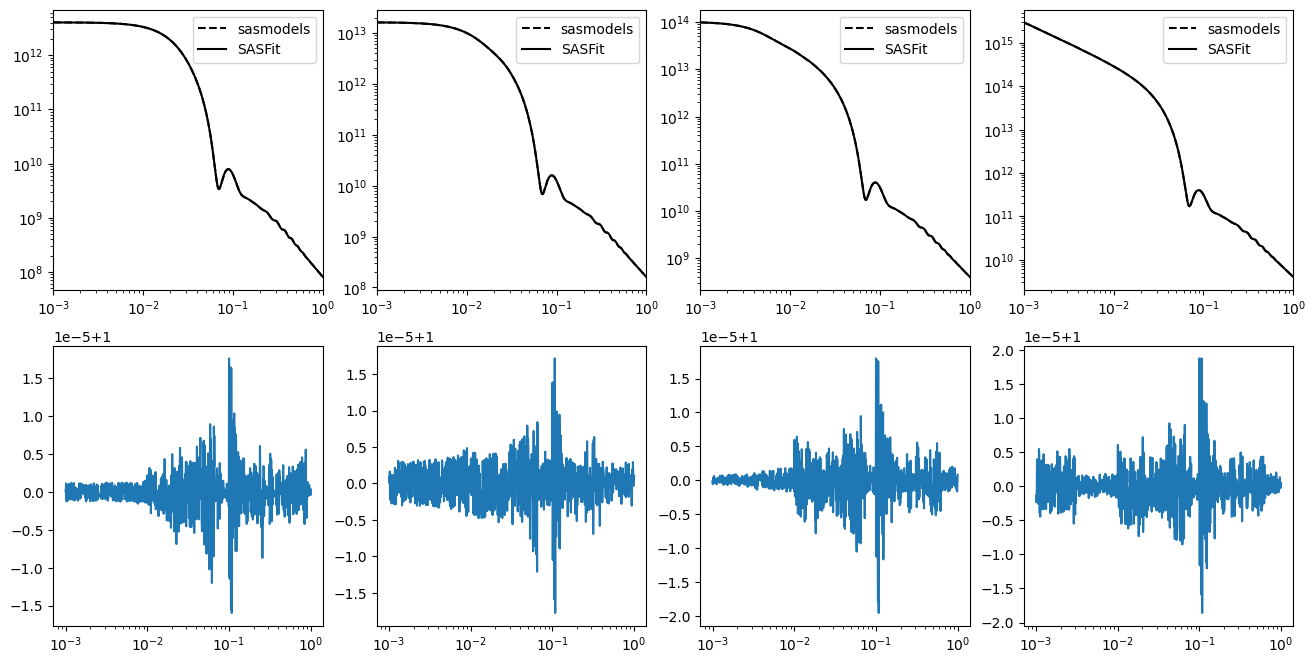

CPU times: user 2.01 s, sys: 102 ms, total: 2.11 s
Wall time: 1.59 s


In [11]:
%%time

files = ["03_rod_20nm", "03_rod_40nm", "03_rod_100nm", "03_rod_1000nm"]
model = load_model("../models/longcylinder_micelle.py")

fig, axs = plt.subplots(2,4, figsize=(4*4, 2*4))
lengths = [200,400,1000,10000]
for i in range(4):
    cyl_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : 1.0,
            'sld_core' : 2.0,
            'sld_corona' : 2.0,
            'radius_core': 40.0,
            'length_core' : lengths[i],
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    data_sasfit = pd.read_csv("./SASFit/version2/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]*1e6
    kernel = model.make_kernel([q])
    Iq_sasmodels = call_kernel(kernel, cyl_params)
    axs[0,i].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")

    axs[0,i].loglog(q, Iq_sasfit, color='k', label="SASFit")

    axs[0,i].set_xlim([1e-3, 1e0])
    axs[0,i].legend()
    axs[1,i].plot(q, Iq_sasfit/Iq_sasmodels)
    axs[1,i].set_xscale('log')
plt.show()

## Comapre simple spherical geometry 

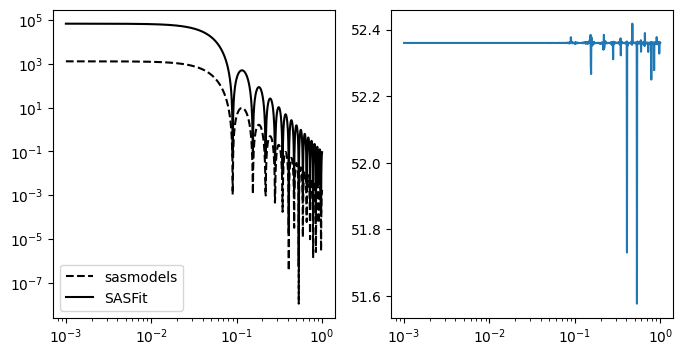

In [12]:
data_sasfit = pd.read_csv("./SASFit/version2/ZZ_sphere_default", sep=";", header=None).iloc[:,[0,1]]
q = data_sasfit.iloc[:,0]*1e-1 # to convert from nm^-1 A^-1
Iq_sasfit = data_sasfit.iloc[:,1]*1e6 # to convert from nm^-1 to cm^-1

model_sasmodels = load_model("sphere")
kernel_sasmodels = model_sasmodels.make_kernel([q])
params_sasmodels = {
    'scale' : 1.0,
    'background' : 0.0,    
    'sld' : 1.0,
    'sld_solvent' : 6.0,
    'radius' : 50
    }
Iq_sasmodels = call_kernel(kernel_sasmodels, params_sasmodels)

fig, axs = plt.subplots(1,2, figsize=(4*2, 4))
axs[0].loglog(q, Iq_sasmodels, ls='--', color='k', label="sasmodels")
axs[0].loglog(q, Iq_sasfit, color='k', label="SASFit")
axs[0].legend()

axs[1].plot(q, Iq_sasfit/Iq_sasmodels)
axs[1].set_xscale('log')
plt.show()